In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.size'] = 25


Confusion Matrix:


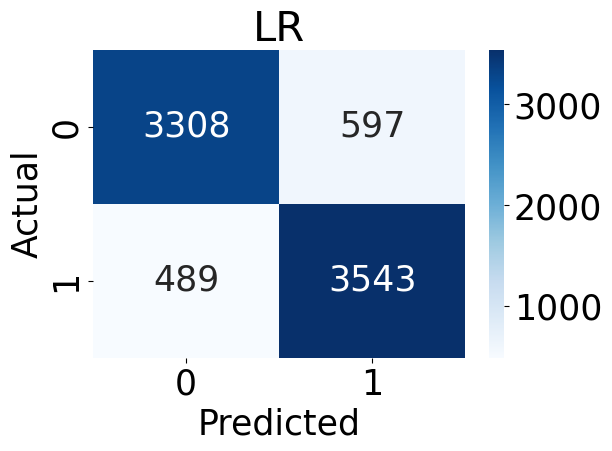


Confusion Matrix:


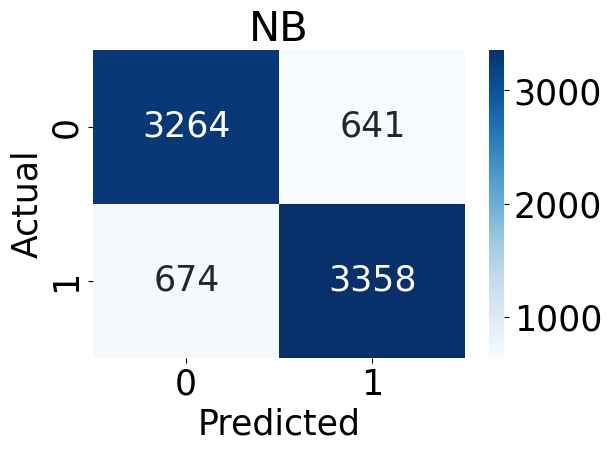


Confusion Matrix:


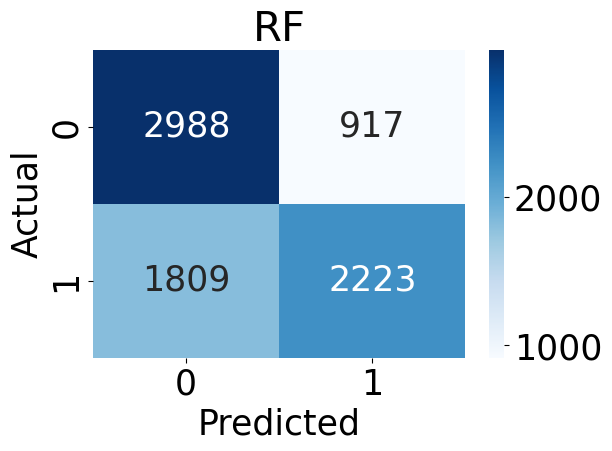


Confusion Matrix:


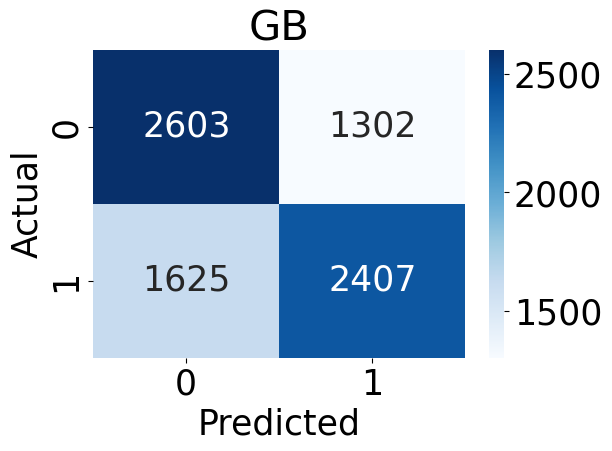

In [2]:
confusion_matrix = np.array(
    [[[3308, 597], [489, 3543]],
     [[3264, 641], [674, 3358]],
     [[2988, 917], [1809, 2223]],
     [[2603, 1302], [1625, 2407]]
    ]
)

model_names = ['LR', 'NB', 'RF', 'GB']

for i in range(4):
    print('\nConfusion Matrix:')
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix[i], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(model_names[i])
    plt.show()

In [3]:
plt.rcParams['font.size'] = 20
# Create a dictionary to store the test results of each model
Evaluation_Results = {
    'LR': [0.8632, 0.8558, 0.8787, 0.8671, 0.9321],
    'NB': [0.8343, 0.8397, 0.8328, 0.8363, 0.8966],
    'RF': [0.6565, 0.7080, 0.5513, 0.6199, 0.7309],
    'GB': [0.6312, 0.6490, 0.5970, 0.6219, 0.6889],
}

# Convert the dictionary to a pandas DataFrame
Evaluation_Results_df = pd.DataFrame(Evaluation_Results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC score']).T
Evaluation_Results_Valid_df = pd.DataFrame(Evaluation_Results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC score']).T
Evaluation_Results_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
LR,0.8632,0.8558,0.8787,0.8671,0.9321
NB,0.8343,0.8397,0.8328,0.8363,0.8966
RF,0.6565,0.7080,0.5513,0.6199,0.7309
GB,0.6312,0.6490,0.5970,0.6219,0.6889


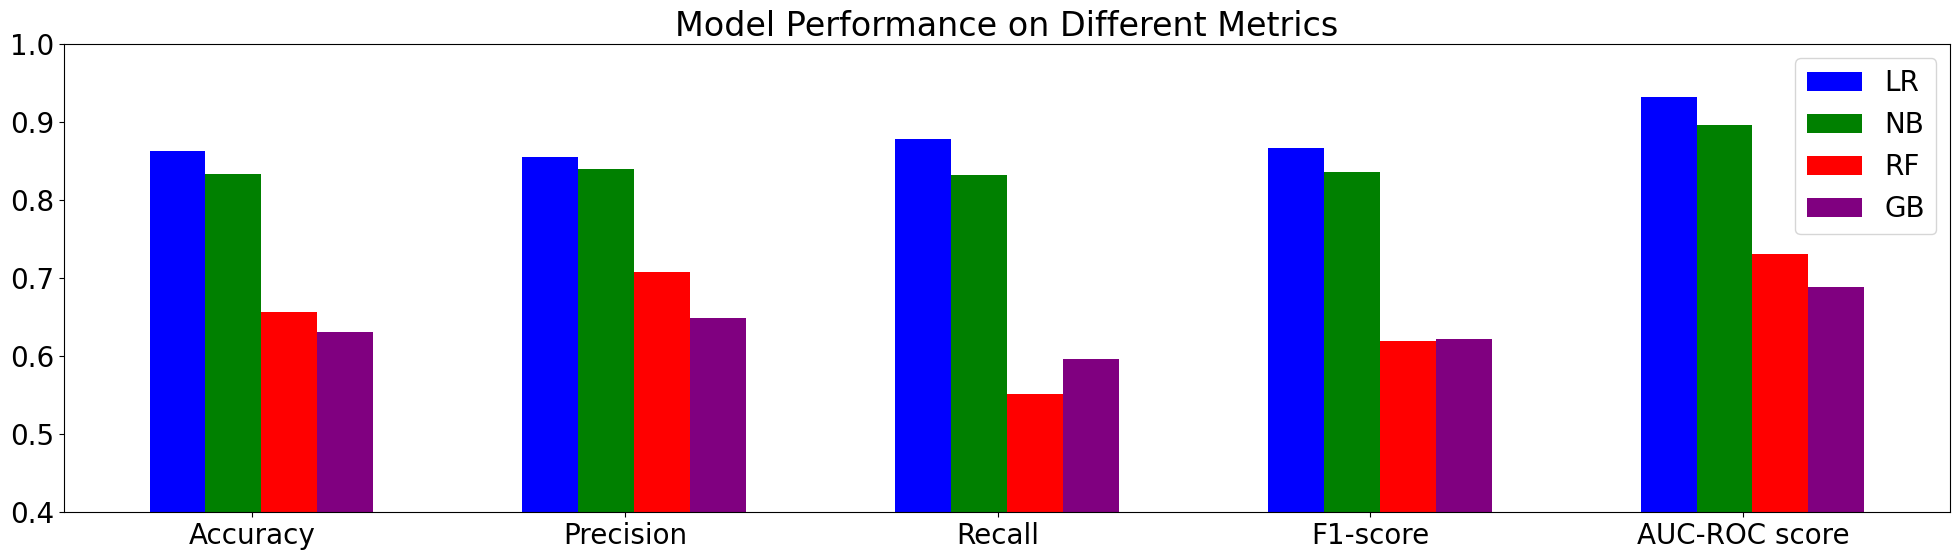

In [4]:
# Adjusting the visualization to use different colors for different models

# Define a color palette for the models
model_colors = {'LR': 'blue', 'NB': 'green', 'RF': 'red', 'GB': 'purple'}

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 6))

# Plotting with different colors for each model
for i, model in enumerate(Evaluation_Results_df.index):
    # Set the positions of the bars on the x-axis for each model
    indices = np.arange(len(Evaluation_Results_df.columns)) + i * 0.15
    ax.bar(indices, Evaluation_Results_df.loc[model], 0.15, label=model, color=model_colors[model])

# Add some text for labels and title
ax.set_title('Model Performance on Different Metrics')
ax.set_xticks(np.arange(len(Evaluation_Results_df.columns)) + 0.2)
ax.set_xticklabels(Evaluation_Results_df.columns)
ax.set_ylim(0.4, 1.0)  # Adjusting y-axis limits
ax.legend()

plt.tight_layout()
plt.show()

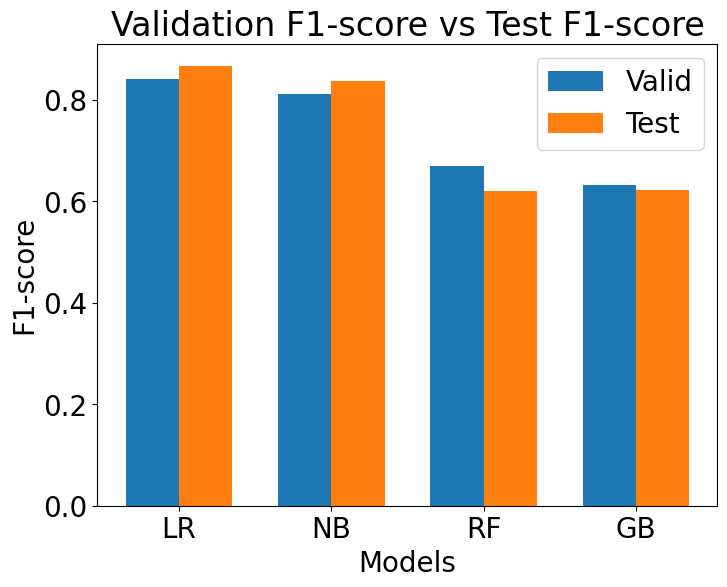

In [5]:
# Validation F1-Score for all models
# Creating a visualization with both test and valid data for F1-score only, for each model

# Sample data with only F1-score for demonstration
# Test data
Evaluation_Results_Test_df = pd.DataFrame({
    'F1-score': Evaluation_Results_df['F1-score']
}, index=['LR', 'NB', 'RF', 'GB']).T

# Valid data
Evaluation_Results_Valid_df = pd.DataFrame({
    'F1-score': [0.841819, 0.812048, 0.668898, 0.632339]
}, index=['LR', 'NB', 'RF', 'GB']).T

# Initialize the matplotlib figure with the new style
fig, ax = plt.subplots(figsize=(8, 6))

# Number of models
n_models = len(Evaluation_Results_Test_df.columns)
width = 0.35  # the width of the bars

# Create bars for F1-score of each model for both test and valid data
ax.bar(np.arange(n_models) - width/2, Evaluation_Results_Valid_df.loc['F1-score'], width, label='Valid')
ax.bar(np.arange(n_models) + width/2, Evaluation_Results_Test_df.loc['F1-score'], width, label='Test')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('F1-score')
ax.set_title('Validation F1-score vs Test F1-score')
ax.set_xticks(np.arange(n_models))
ax.set_xticklabels(Evaluation_Results_Test_df.columns)
ax.legend()

plt.show()